# using perception trick

In [1]:
from sklearn.datasets import make_classification
import numpy as np

X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=1,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=22,
    hypercube=False,
    class_sep=10,
)

In [2]:
def step(X):
    return 1 if X > 0 else 0

In [3]:
def perceptron(X, y):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for _ in range(1000):
        j = np.random.randint(0, 100)
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr * (y[j] - y_hat) * X[j]

    return weights[0], weights[1:]

In [4]:
intercept_, coef_ = perceptron(X, y)

In [5]:
print(f"{intercept_} {coef_}")

-0.09999999999999992 [0.3516553  0.01956235]


In [6]:
m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])

In [7]:
x_input = np.linspace(-3, 3, 100)
y_input = m * x_input + b

(-3.0, 2.0)

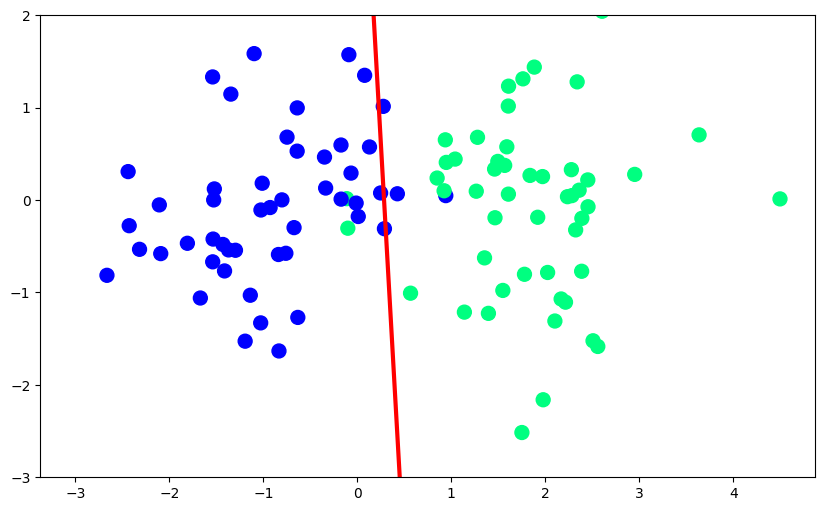

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color="red", linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter", s=100)
plt.ylim(-3, 2)